In [113]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [114]:
data = pd.read_csv('../Datasets_for_work/Data_6/xyz coordinates.csv')
data

,X,Y,Z
0,6,7,7
1,10,9,2
2,2,7,6
3,9,2,7
4,3,5,10
5,4,2,4
6,1,2,4
7,10,3,10
8,2,7,5
9,5,5,2


In [115]:
from sklearn.metrics import silhouette_score

models = []
score_1 = []
score_2 = []

In [116]:
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(data)
    models.append(model)
    score_1.append(model.inertia_)
    score_2.append(silhouette_score(data, model.labels_))

D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

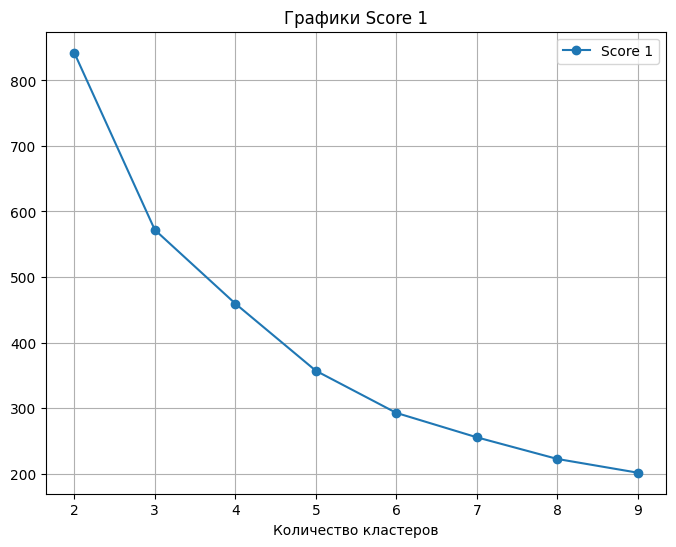

In [117]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.plot(np.arange(2, 10), score_1, marker='o', label='Score 1')
plt.title('Графики Score 1')
plt.xlabel('Количество кластеров')
plt.legend()
plt.show()

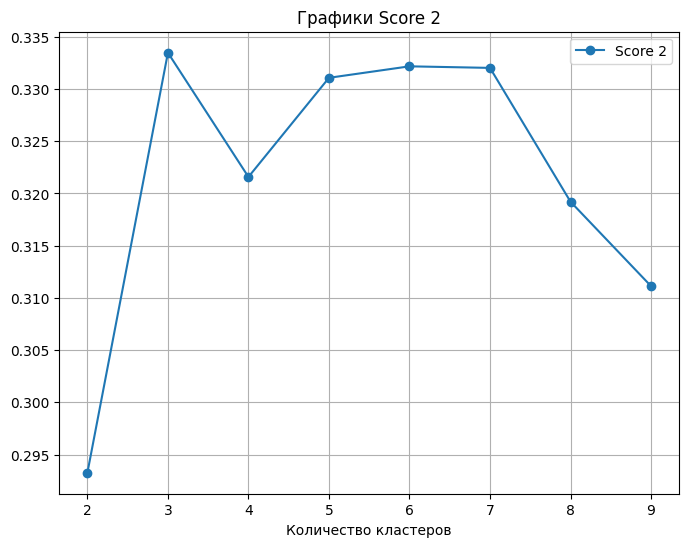

In [118]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.plot(np.arange(2, 10), score_2, marker='o', label='Score 2')
plt.title('Графики Score 2')
plt.xlabel('Количество кластеров')
plt.legend()
plt.show()

In [119]:
model1 = KMeans(n_clusters=3, random_state=123, init='k-means++')

In [120]:
model1.fit(data)
model1.cluster_centers_

D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([[8.93333333, 5.6       , 7.93333333],
       [4.72727273, 7.86363636, 4.31818182],
       [2.30769231, 2.15384615, 6.23076923]])

In [121]:
labels = model1.labels_

In [122]:
plt.figure(figsize=(16, 12))
fig = go.Figure(data=[go.Scatter3d(x=data['X'], y=data['Y'], z=data['Z'],
                                   mode='markers', marker=dict(color=labels, size=5))])
fig.show()

<Figure size 1600x1200 with 0 Axes>

In [123]:
from sklearn.cluster import AgglomerativeClustering

model2 = AgglomerativeClustering(3, compute_distances=True)
clastering = model2.fit(data)
labels = clastering.labels_

In [124]:
fig = go.Figure(data=[go.Scatter3d(x=data['X'], y=data['Y'], z=data['Z'],
                                   mode='markers', marker=dict(color=labels, size=5))])
fig.show()

In [125]:
from sklearn.cluster import DBSCAN

model3 = DBSCAN(eps=3, min_samples=6).fit(data)

In [126]:
labels = model3.labels_
labels

array([ 0, -1,  0, -1, -1,  1,  1, -1,  0,  0,  0,  1, -1,  1,  0,  1, -1,
        0, -1, -1,  1,  1,  1,  0,  1,  0,  0,  1,  0, -1, -1,  0,  0,  0,
       -1,  0,  0,  1,  0, -1, -1,  1,  0,  0,  0,  1,  0,  0, -1,  1],
      dtype=int64)

In [127]:
fig = go.Figure(data=[go.Scatter3d(x=data['X'], y=data['Y'], z=data['Z'], mode='markers', marker=dict(color=labels, size=5))])
fig.show()

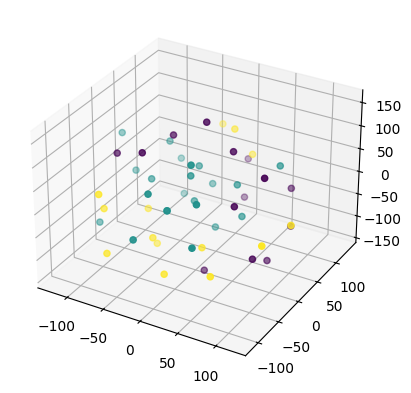

In [128]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=3)
embedding = tsne.fit_transform(data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=labels, cmap='viridis')  # labels - метки кластеров или целевая переменная
plt.show()